## Assignment-5
## Pradeep Mundlik (AI21BTECH11022)

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
from scipy import stats

### Question-1

In [92]:
data = np.array([[2.12, 0.04],
[2.71, 0.11],
[3.44, 0.12],
[2.76, 1.20],
[2.72, 0.12],
[0.96, 0.30],
[2.00, 0.60],
[3.26, 0.60],
[2.50, 0.30],
[1.20, 0.40],
[1.62, 0.30],
[1.30, 0.00],
[1.96, 0.34],
[2.60, 0.50],
[1.30, 0.20],
[2.67, 0.03],
[4.40, 2.10],
[1.80, 0.80],
[4.90, 3.90],
[2.39, 0.90],
[1.62, 1.05],
[1.47, 0.95],
[0.89, 0.13],
[2.52, 0.30],
[1.21, 0.25],
[0.90, 0.10],
[0.80, 0.15]])

Density: Statistics=0.925, p=0.051
Log Density: Statistics=0.969, p=0.566


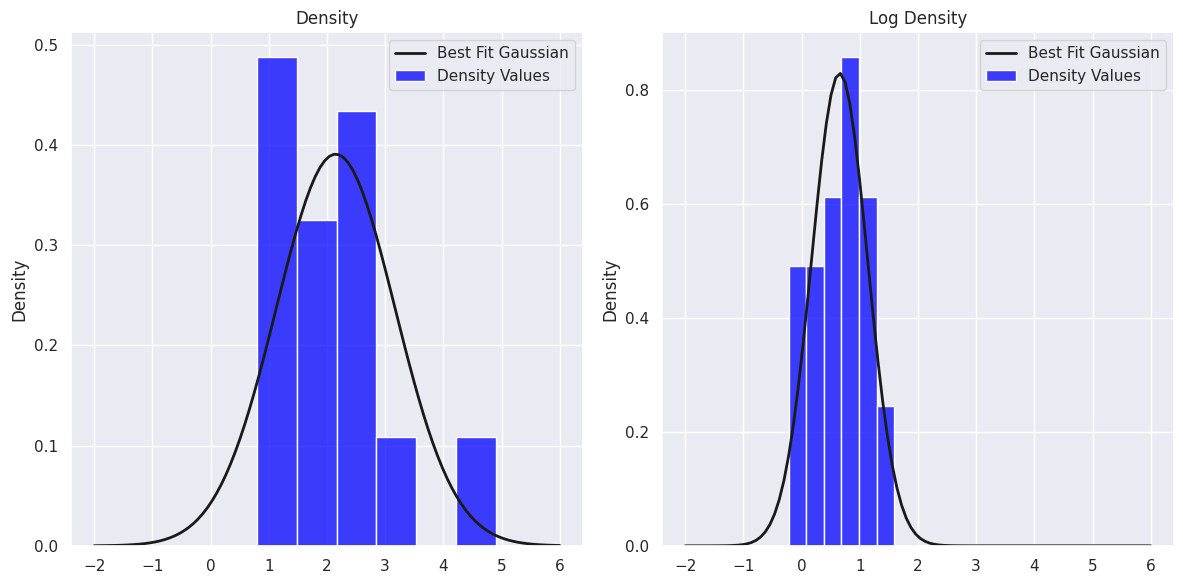

In [93]:
# Extract density values
density = data[:, 0]

# Apply Shapiro-Wilk test to density values
stat, p = stats.shapiro(density)
print('Density: Statistics=%.3f, p=%.3f' % (stat, p))

# Apply Shapiro-Wilk test to natural logarithm of density values
log_density = np.log(density)
stat, p = stats.shapiro(log_density)
print('Log Density: Statistics=%.3f, p=%.3f' % (stat, p))

# Plot histogram of density values and overlay best-fit normal distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(density, kde=False, bins='auto', color='blue', stat='density')
xmin, xmax = -2, 6
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, density.mean(), density.std())
plt.plot(x, p, 'k', linewidth=2)
plt.title('Density')
plt.legend(['Best Fit Gaussian', 'Density Values'])

# Plot histogram of natural logarithm of density values and overlay best-fit normal distribution
plt.subplot(1, 2, 2)
sns.histplot(log_density, kde=False, bins='auto', color='blue', stat='density')
xmin, xmax = -2, 6
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, log_density.mean(), log_density.std())
plt.plot(x, p, 'k', linewidth=2)
plt.title('Log Density')
plt.legend(['Best Fit Gaussian', 'Density Values'])

plt.tight_layout()
plt.show()


### Question-2

In [94]:
data = pd.read_csv('HIP_star.txt',sep='\s',engine='python')
data

,HIP,Vmag,RA,DE,Plx,pmRA,pmDE,e_Plx,B-V
0,2,9.27,0.003797,-19.498837,21.90,181.21,-0.93,3.10,0.999
1,38,8.65,0.111047,-79.061831,23.84,162.30,-62.40,0.78,0.778
2,47,10.78,0.135192,-56.835248,24.45,-44.21,-145.90,1.97,1.150
3,54,10.57,0.151656,17.968956,20.97,367.14,-19.49,1.71,1.030
4,74,9.93,0.221873,35.752722,24.22,157.73,-40.31,1.36,1.068
...,...,...,...,...,...,...,...,...,...
2714,118207,8.38,359.662248,77.262113,23.37,18.87,-44.04,0.70,0.651
2715,118213,8.28,359.690763,31.939823,20.33,76.66,-134.59,0.94,0.734
2716,118251,8.16,359.778318,41.170547,22.91,82.20,3.56,0.82,0.652
2717,118254,7.72,359.787381,41.201736,22.19,80.21,4.40,0.80,0.563


In [95]:
# Filter Hyades stars
hyades_stars = data[(data['RA'] >= 50) & (data['RA'] <= 100) & 
                    (data['DE'] >= 0) & (data['DE'] <= 25) & 
                    (data['pmRA'] >= 90) & (data['pmRA'] <= 130) & 
                    (data['pmDE'] >= -60) & (data['pmDE'] <= -10)]

# Filter non-Hyades stars
non_hyades_stars = data[~data.index.isin(hyades_stars.index)]

# Perform two-sample t-test
t_stat, p_val = stats.ttest_ind(hyades_stars['B-V'], non_hyades_stars['B-V'])

print(f'T-statistic: {t_stat}\nP-value: {p_val}')


T-statistic: -3.860436921860911
P-value: 0.00011582222192442334


For the null hypothesis that the color of Haydes stars and non-Haydes stars have identical colour, the p-value is very small
Therefore, the colours vary


### Question-3

In [96]:
data = pd.read_csv('BeppoSAX.txt',sep='\s',engine='python',header=None)
data

,0
0,3.00
1,11.00
2,14.00
3,32.00
4,6.00
...,...
998,16.00
999,11.00
1000,109.00
1001,4.45


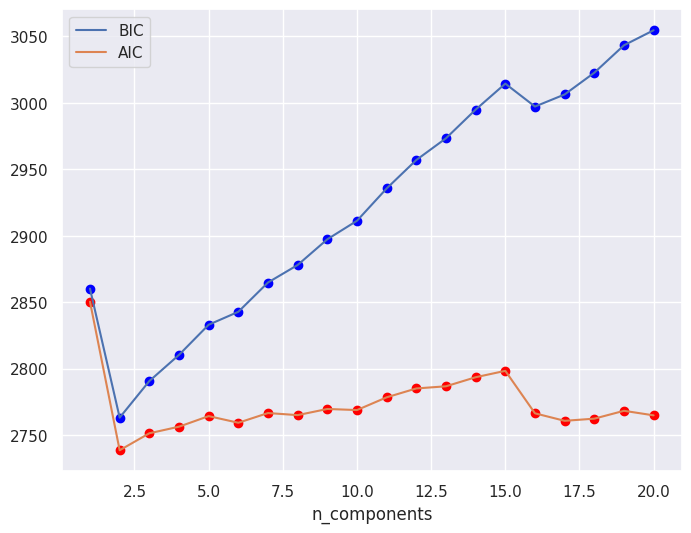

In [97]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

# Extract T90 data and apply log10 transformation
T90_data = np.log10(data[0])

# Standardize the data
scaler = StandardScaler()
T90_data_scaled = scaler.fit_transform(T90_data.values.reshape(-1, 1))

n_components = np.arange(1, 21)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(T90_data_scaled)
          for n in n_components]

plt.figure(figsize=(8, 6))
plt.plot(n_components, [m.bic(T90_data_scaled) for m in models], label='BIC')
plt.plot(n_components, [m.aic(T90_data_scaled) for m in models], label='AIC')
plt.scatter(n_components, [m.bic(T90_data_scaled) for m in models], color='blue')
plt.scatter(n_components, [m.aic(T90_data_scaled) for m in models], color='red')
plt.legend(loc='best')
plt.xlabel('n_components')
plt.show()


From the figure, we can see that the optimal value for the number of components is 2